In [36]:
# import packages
import numpy as np
import matplotlib.pyplot as pp
import pylab
import scipy
import pandas as pd
from scipy.optimize import curve_fit
import pickle
from models_functions import mf_noseg, mf_noseg_BA, mf_noseg_FA
from fit_functions import fit_mf_noseg

%matplotlib inline

# list of files
list_of_files=['hoaxy_4th-mysterious-death-connected-to-the-dnc_cum','hoaxy_alicia-machado-adult-star_cum','hoaxy_bill-clinton-illegitimate-son_cum','hoaxy_black-lives-matter-protesters-chant-for-dead-cops-now-in-baton-rouge_cum','hoaxy_black-protesters-targeted-whites-in-milwaukee_cum','hoaxy_clinton-byrd-photo-klan_cum','hoaxy_clinton-compliant-citizenry_cum','hoaxy_clinton-secret-earpiece-debate_cum','hoaxy_clintons_zeifman_cum','hoaxy_debate-secret-hand-signals_cum','hoaxy_deray-mckesson-and-the-summer-of-chaos_cum','hoaxy_dnc-hiring-actors-via-craigslist-to-replace-delegates_cum','hoaxy_dr-drew-hillary-clinton-health_cum','hoaxy_flags-banned-at-dnc_cum','hoaxy_google-manipulate-hillary-clinton_cum','hoaxy_hillary-clinton-freed-child-rapist-laughed-about-it_cum','hoaxy_hillary-clinton-has-parkinsons-disease_cum','hoaxy_hillary-clinton-medical-records-leaked_cum','hoaxy_hillary-clinton-seizure-video_cum','hoaxy_julian-assange-bernie-sanders-was-threatened_cum','hoaxy_khizr-khan-375000-clinton-foundation_cum','hoaxy_khizr-khan-is-a-muslim-brotherhood-agent_cum','hoaxy_mexico-border-trump-elected_cum','hoaxy_michael-savage-removed_cum','hoaxy_muslims-in-japan_cum','hoaxy_politics-sites-mismatched-clinton-rally-image-goes-viral_cum','hoaxy_satire_sharia_cum','hoaxy_seth-conrad-rich_cum','hoaxy_three-syrian-refugees-assault-5-year-old-girl-at-knifepoint_cum','hoaxy_tim-kaine-white-people-minority_cum','hoaxy_yokohillary_cum']
path_file = "../../data/"

# threshold for when a contagion is said to have plateaud
plateau_threshold = 48;

In [48]:
popt1 = np.asarray(pickle.load(open("../../data/processed/popt_simple1.pckl","rb"))).T
popt2 = np.asarray(pickle.load(open("../../data/processed/popt_simple2.pckl","rb"))).T

In [49]:
RMSE1 = np.asarray(pickle.load(open("../../data/processed/RMSEerrors_simple1.pckl","rb")))
RMSE2 = np.asarray(pickle.load(open("../../data/processed/RMSEerrors_simple2.pckl","rb")))

NRMSE1 = np.asarray(pickle.load(open("../../data/processed/NRMSEerrors_simple1.pckl","rb")))
NRMSE2 = np.asarray(pickle.load(open("../../data/processed/NRMSEerrors_simple2.pckl","rb")))

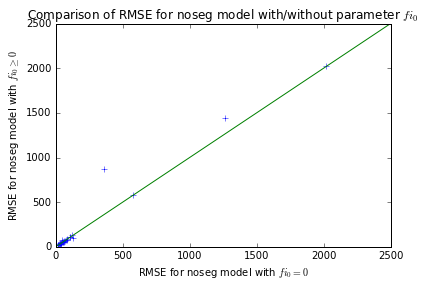

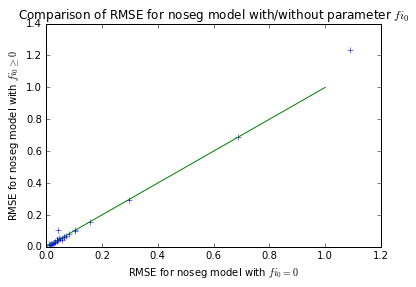

In [50]:
pp.figure()
pp.plot(RMSE1, RMSE2,'+', np.linspace(1,2500,2500),np.linspace(1,2500,2500))
pp.ylabel("RMSE for noseg model with $fi_0\geq0$")
pp.xlabel("RMSE for noseg model with $fi_0=0$")
pp.title("Comparison of RMSE for noseg model with/without parameter $fi_0$")
pp.show()

pp.figure()
pp.plot(NRMSE1, NRMSE2,'+', np.linspace(0,1),np.linspace(0,1))
pp.ylabel("RMSE for noseg model with $fi_0\geq0$")
pp.xlabel("RMSE for noseg model with $fi_0=0$")
pp.title("Comparison of RMSE for noseg model with/without parameter $fi_0$")
pp.show()

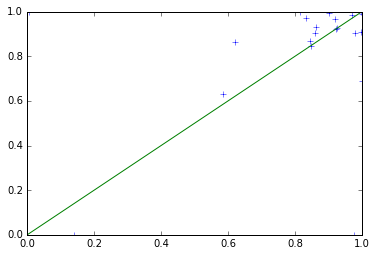

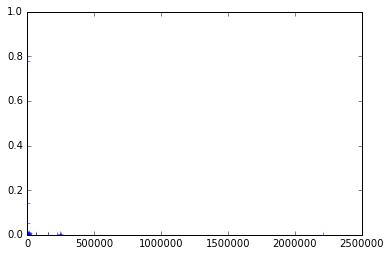

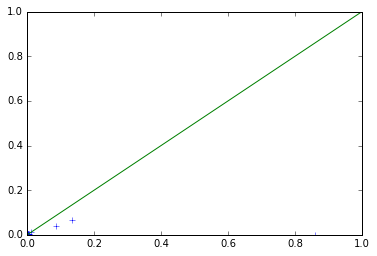

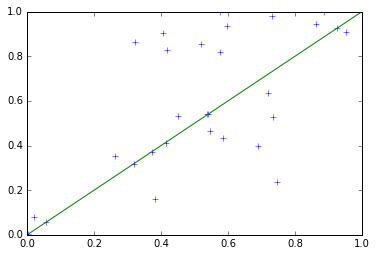

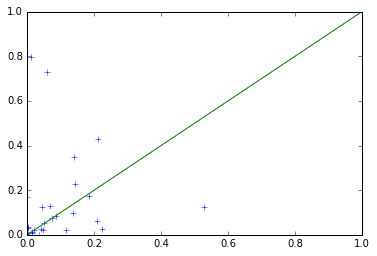

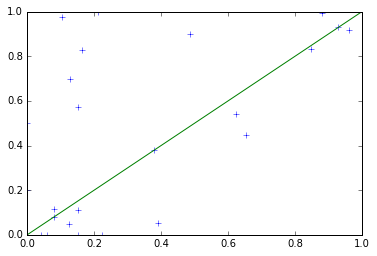

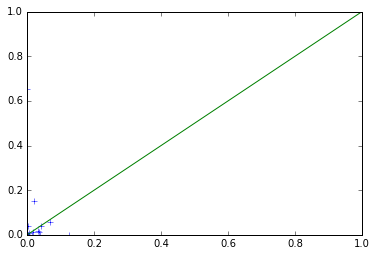

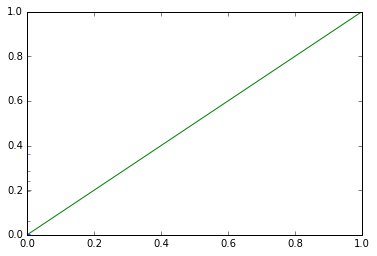

In [40]:
for i in np.linspace(0,7,8,dtype=int):
    pp.figure()
    pp.plot(popt1[i], popt2[i],'+', np.linspace(0,1),np.linspace(0,1))

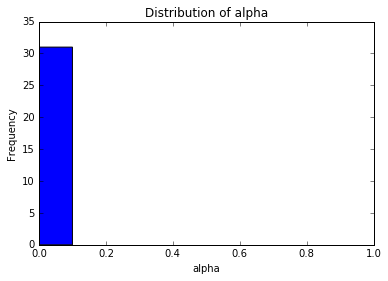

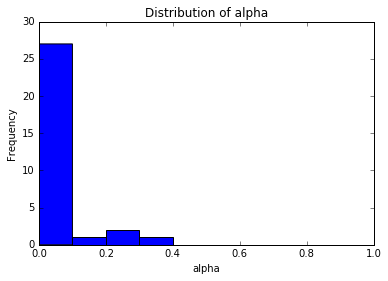

In [51]:
param_label_noseg = ["alpha", "N", "pv", "tauINV", "ba_init", "bi_init", "fa_init", "fi_init"]

# alpha1
pp.hist(popt1[7],range=(0,1))
pp.title("Distribution of " + param_label_noseg[0])
pp.xlabel(param_label_noseg[0])
pp.ylabel("Frequency")
pp.savefig("../../output/hoaxy_ALL/param_distributions/alpha.pdf")
pp.show()

# alpha2
pp.hist(popt2[7],range=(0,1))
pp.title("Distribution of " + param_label_noseg[0])
pp.xlabel(param_label_noseg[0])
pp.ylabel("Frequency")
pp.savefig("../../output/hoaxy_ALL/param_distributions/alpha.pdf")
pp.show()

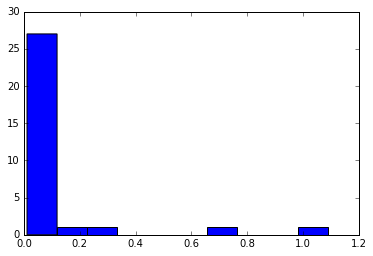

(array([ 1,  8, 10, 15, 26, 27]),)


In [54]:
pp.hist(NRMSE1)
pp.show()
print np.nonzero(NRMSE1 > 0.1)